# Data Exploration for Walmart Sales Forecasting

This notebook explores Walmart sales data to understand its structure, identify key features, and gain initial insights that will guide the rest of the project.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the datasets
features_df = pd.read_csv('../Data/features.csv')
stores_df = pd.read_csv('../Data/stores.csv')
train_df = pd.read_csv('../Data/train.csv')
test_df = pd.read_csv('../Data/test.csv')

# First few rows of each dataset
print("Features DataFrame:")
print(features_df.head())

print("\nStores DataFrame:")
print(stores_df.head())

print("\nTrain DataFrame:")
print(train_df.head())

print("\nTest DataFrame:")
print(test_df.head())


Features DataFrame:
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  

Stores DataFrame:
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3 

In [3]:
# Checking data types
print("Features Data Types and Info:")
print(features_df.info())

print("\nStores Data Types and Info:")
print(stores_df.info())

print("\nTrain Data Types and Info:")
print(train_df.info())

print("\nTest Data Types and Info:")
print(test_df.info())

# Summary statistics
print("\nSummary Statistics for Features DataFrame:")
print(features_df.describe())

print("\nSummary Statistics for Train DataFrame:")
print(train_df.describe())

# Count the number of True and False values in the IsHoliday column
holiday_counts = train_df['IsHoliday'].value_counts()

# Display the counts
print(holiday_counts)



Features Data Types and Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None

Stores Data Types and Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  ---

In [4]:
# Ensuring 'Date' columns are of datetime type
train_df['Date'] = pd.to_datetime(train_df['Date'])
features_df['Date'] = pd.to_datetime(features_df['Date'])

Weekly Sales = Weekly Sales for a given department in a given store

In [5]:
# Checking missing values
print("\nMissing Values in Features Dataset:")
display(features_df.isnull().sum())

print("\nMissing Values in Stores Dataset:")
display(stores_df.isnull().sum())

print("\nMissing Values in Train Dataset:")
display(train_df.isnull().sum())

# Checking percentage of missing values in markdown columns in the features dataset
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
missing_markdown = features_df[markdown_cols].isnull().mean() * 100
print("\nPercentage of Missing Values in MarkDown Columns:")
display(missing_markdown)



Missing Values in Features Dataset:


Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


Missing Values in Stores Dataset:


Store    0
Type     0
Size     0
dtype: int64


Missing Values in Train Dataset:


Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64


Percentage of Missing Values in MarkDown Columns:


MarkDown1    50.769231
MarkDown2    64.334554
MarkDown3    55.885226
MarkDown4    57.704518
MarkDown5    50.549451
dtype: float64

## Taking a look into what analysis needs to be done

In [6]:
# Merging train, features, and stores datasets
merged_data = pd.merge(train_df, features_df, on=['Store', 'Date'], how='left')
merged_data = pd.merge(merged_data, stores_df, on='Store', how='left')

# One-hot encoding the 'Type' column
merged_data = pd.get_dummies(merged_data, columns=['Type'], drop_first=True)

# Check the new columns created
merged_data.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Size,Type_B,Type_C
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,151315,False,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,151315,False,False
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,151315,False,False
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,151315,False,False
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,151315,False,False


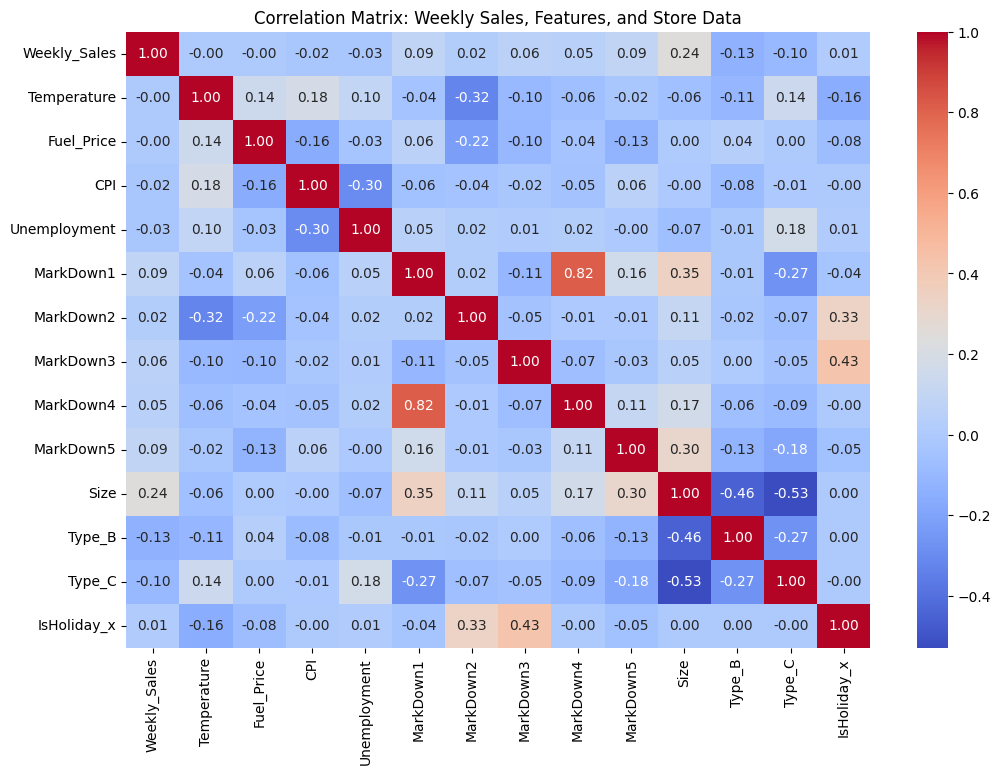

In [7]:
# correlation matrix 
corr_matrix = merged_data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
                           'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 
                           'Size', 'Type_B', 'Type_C','IsHoliday_x']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Weekly Sales, Features, and Store Data')
plt.show()



### Immediate take aways

1. Store size has strongest correlation with weekly sales- makes logical sense. Could look later to see if certain markdowns are more effective for larger stores. 

2. Holidays have weak impact on weekly sales- likely because its so dilluted considering that there are few holidays. 

3. Need to better understand what MarkDowns are

Need to look into:

1. Department level trends

2. CPI and Unemployment

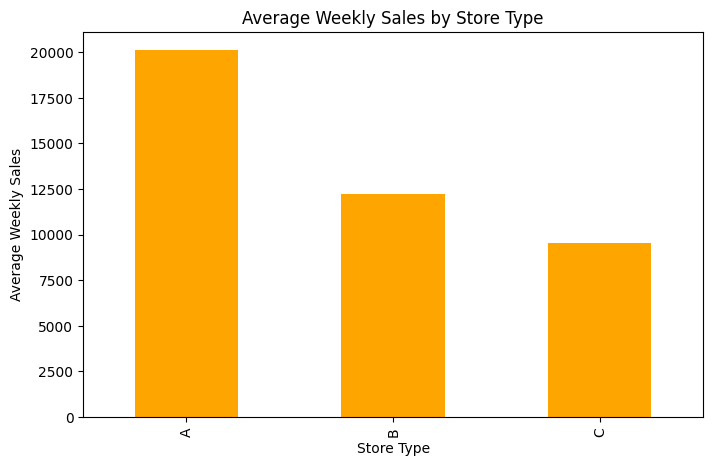

Type
A    [151315, 202307, 205863, 202505, 155078, 20749...
B    [37392, 34875, 70713, 125833, 126512, 112238, ...
C                         [42988, 39910, 39690, 41062]
Name: Size, dtype: object

In [8]:
# Merging the train and stores datasets again to evaluate store Types
train_merged_df = train_df.merge(stores_df, on='Store')

# Aggregating sales by store type
sales_by_store_type = train_merged_df.groupby('Type')['Weekly_Sales'].mean()

# Plotting sales by store type
plt.figure(figsize=(8, 5))
sales_by_store_type.plot(kind='bar', color='orange')
plt.title('Average Weekly Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Weekly Sales')
plt.show()

# Grouping by store type and checking the unique sizes for each store type
store_sizes_by_type = stores_df.groupby('Type')['Size'].unique()

# Displaying the unique sizes for each store type
store_sizes_by_type


Store Type A: ~150k-207k sq feet

Store Type B: ~34k-126k sq feet

Store Type C: ~39k-43k sq feet

Confirming larger stores yield larger sales.

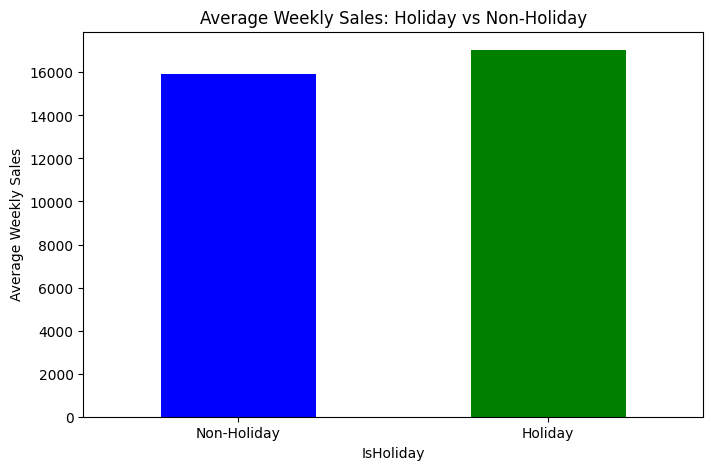

In [9]:
# Aggregating sales by holiday or non-holiday
holiday_sales = train_df.groupby('IsHoliday')['Weekly_Sales'].mean()

# Plotting sales during holidays vs. non-holidays
plt.figure(figsize=(8, 5))
holiday_sales.plot(kind='bar', color=['blue', 'green'])
plt.title('Average Weekly Sales: Holiday vs Non-Holiday')
plt.xlabel('IsHoliday')
plt.ylabel('Average Weekly Sales')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'], rotation=0)
plt.show()

Confirming there isn't a huge difference between sales during non-holiday and holiday periods, but there is a difference- noted for later. 

## Exploring the MarkDown Features


MarkDowns represent different types of discounts Walmart applies to products. 

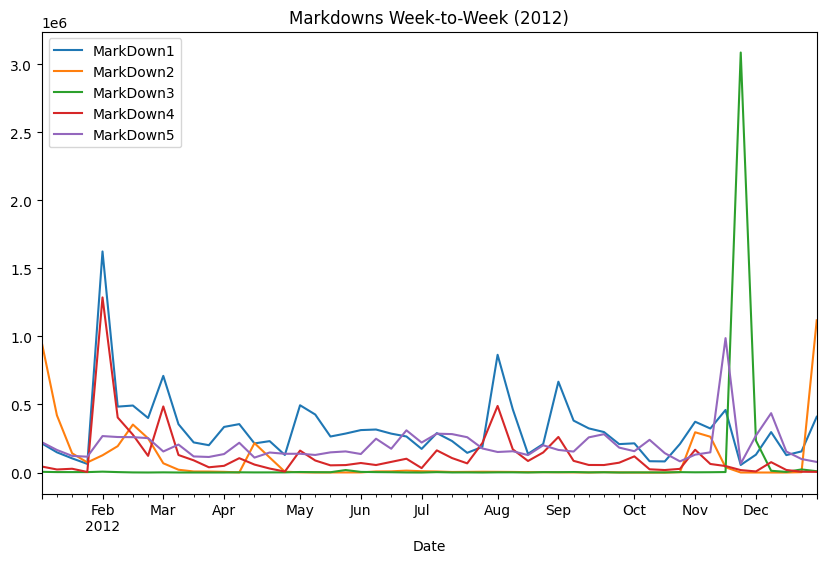

In [10]:
# Convert 'Date' column to datetime if it's not already
features_df['Date'] = pd.to_datetime(features_df['Date'])

# Filter for one year (2012)
filtered_df = features_df[(features_df['Date'] >= '2012-01-01') & (features_df['Date'] <= '2012-12-31')]

# Resample data by week to get weekly sums or averages
weekly_data = filtered_df.set_index('Date').resample('W').sum()

# Plot markdowns week-to-week
weekly_data[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(figsize=(10,6))
plt.title('Markdowns Week-to-Week (2012)')
plt.show()



MarkDown1: relatively consistent throughout the year with noticeable spikes in February, March, May, August, and September: might represent general store-wide promotions that occur regularly throughout the year

MarkDown2: Isolated spikes in January, late February, mid April, and early November: seems to be used sporadically for specific, high-impact events such as clearance of inventory, seasonal promotions, or pre-holiday preparations. Does not seem to be part of regular store-wide promotions.  

MarkDown3: Dormant for all periods except late November- likely Black Friday promos

MarkDown4: Extremely similar to MarkDown1, might represent more targetted/ supplemental discounts. 

MarkDown5: Very consistent, least spikes, only around Black Friday/ Christmas sales. Could represent clearance events (end-of-season sales)

## Understanding Sales by Department

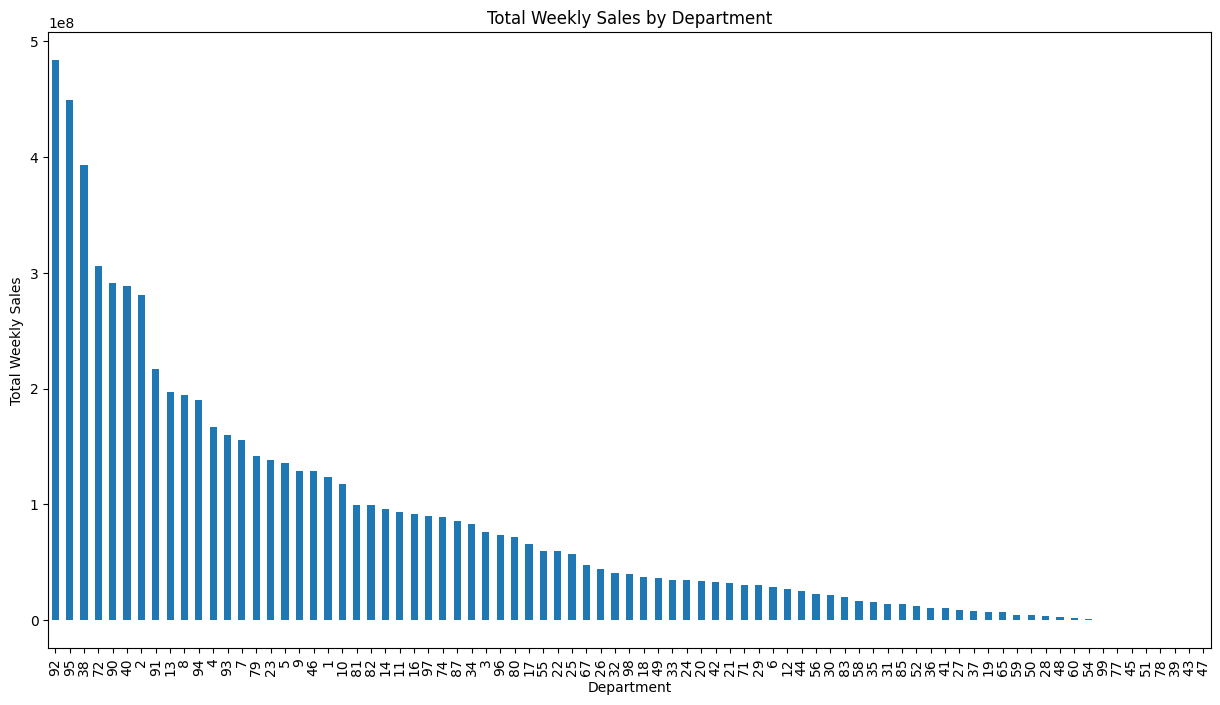

In [11]:
# Aggregating weekly sales by department
dept_sales = train_df.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False)

# Plotting total sales by department
plt.figure(figsize=(15,8))
dept_sales.plot(kind='bar')
plt.title('Total Weekly Sales by Department')
plt.xlabel('Department')
plt.ylabel('Total Weekly Sales')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)
plt.show()



In [12]:
# Calculate the cumulative percentage of sales by department
cumulative_sales_percent = dept_sales.cumsum() / dept_sales.sum() * 100

# Find the departments that contribute up to 90% of total sales
top_depts_90 = cumulative_sales_percent[cumulative_sales_percent <= 70]

# Number of departments that contribute to 90% of sales
top_depts_90_count = len(top_depts_90)

# Display the top departments and the number of departments
print(f'The number of departments that account for 90% of total sales: {top_depts_90_count}')
print(f'Top departments that account for 90% of total sales:\n{top_depts_90}')


The number of departments that account for 90% of total sales: 21
Top departments that account for 90% of total sales:
Dept
92     7.183132
95    13.852355
38    19.687376
72    24.225230
90    28.545536
40    32.834190
2     36.999279
91    40.216952
13    43.145781
8     46.029475
94    48.848330
4     51.329276
93    53.699670
7     56.007411
79    58.106149
23    60.157148
5     62.169957
9     64.075688
46    65.980694
1     67.815854
10    69.565796
Name: Weekly_Sales, dtype: float64


A subset of departments appear to largely drive the sales, will be focusing on the 21 departments that account for 70% of sales (subject to change).

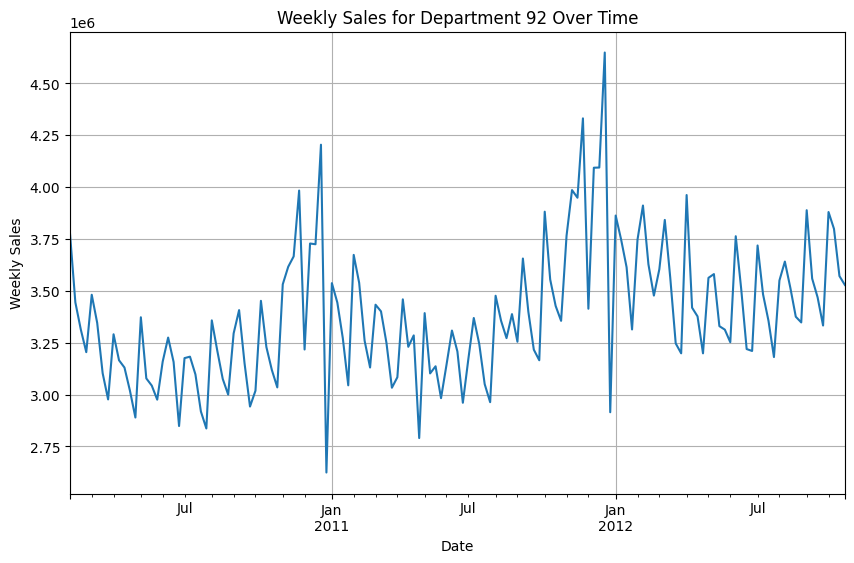

In [13]:
# Filter the data for the top department (e.g., Department 92)
specific_dept = train_df[train_df['Dept'] == 92]

# Aggregate weekly sales by date
weekly_sales_by_date = specific_dept.groupby('Date')['Weekly_Sales'].sum()

# Plot the weekly sales over time for this department
plt.figure(figsize=(10,6))
weekly_sales_by_date.plot()
plt.title('Weekly Sales for Department 92 Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()


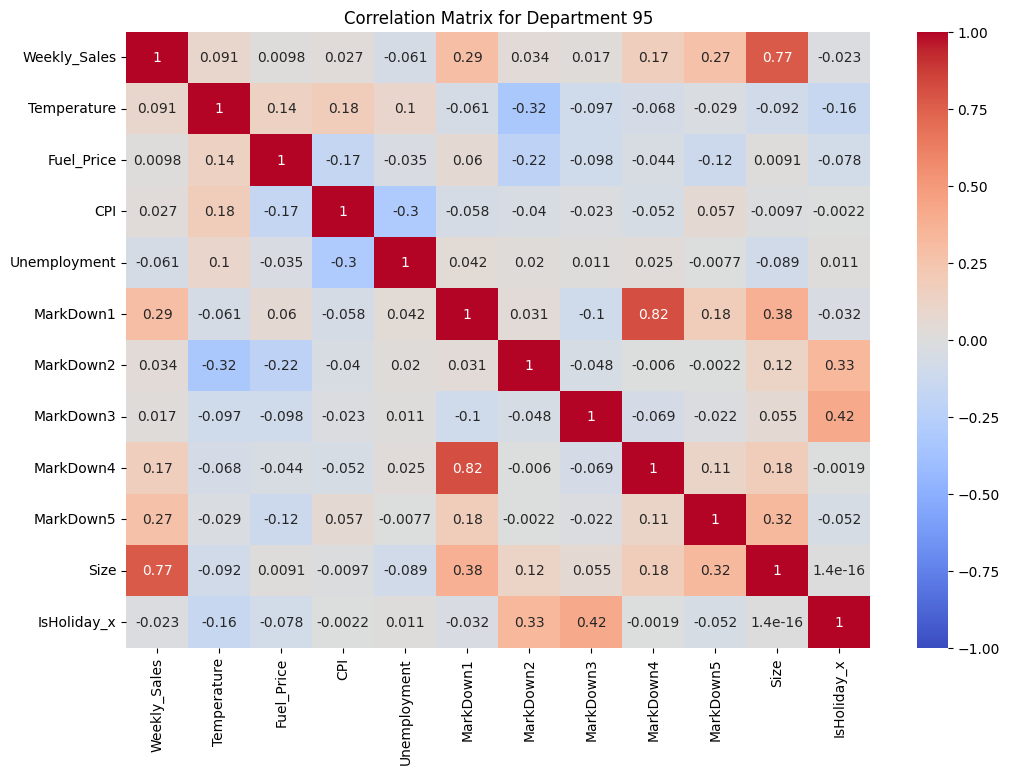

In [14]:
# Filtering data for a specific department
dept = 95 
specific_dept = train_df[train_df['Dept'] == dept]

# Merge with features and stores data to bring in relevant features
specific_dept = pd.merge(specific_dept, features_df, on=['Store', 'Date'], how='left')
specific_dept = pd.merge(specific_dept, stores_df, on='Store', how='left')

# Recalculate correlation matrix for this department
dept_corr_matrix = specific_dept[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
                                  'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 
                                  'Size', 'IsHoliday_x']].corr()

# Plot the correlation matrix for this department
plt.figure(figsize=(12,8))
sns.heatmap(dept_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Department ' + str(dept))
plt.show()


## Preparing Data For PCA

In [15]:
# Step 1: Merging the train, features, and stores datasets
merged_df = pd.merge(train_df, features_df, on=['Store', 'Date'], suffixes=('_train', '_features'))
merged_df = pd.merge(merged_df, stores_df, on='Store')

# Step 2: Handling the duplicate 'IsHoliday' column (dropping one)
merged_df = merged_df.drop(columns=['IsHoliday_features'])

# Step 3: Filling missing values - MarkDown columns with 0 (as missing likely means no markdown)
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
merged_df[markdown_cols] = merged_df[markdown_cols].fillna(0)

# Step 4: Filling missing values for other numerical columns with the mean
numerical_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns
merged_df[numerical_cols] = merged_df[numerical_cols].fillna(merged_df[numerical_cols].mean())

# Step 5: Handling categorical variables - converting 'Type', 'Store', and 'Dept' into dummy variables
merged_df = pd.get_dummies(merged_df, columns=['Type', 'Store', 'Dept'], drop_first=True)

# Step 6: Dropping unnecessary or redundant columns (IsHoliday_train, Type)
merged_df = merged_df.drop(columns=['IsHoliday_train', 'Type_B', 'Type_C', 'Date'])

# Check for missing values and display a preview of the updated dataframe
print(merged_df.isnull().sum())
merged_df.head()


Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
               ..
Dept_95         0
Dept_96         0
Dept_97         0
Dept_98         0
Dept_99         0
Length: 135, dtype: int64


,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,False,False,False,False,False,False,False,False,False,False
1,50605.27,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,False,False,False,False,False,False,False,False,False,False
2,13740.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,False,False,False,False,False,False,False,False,False,False
3,39954.04,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,False,False,False,False,False,False,False,False,False,False
4,32229.38,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,False,False,False,False,False,False,False,False,False,False


## PCA

Explained variance by each principal component:
[0.23326241 0.13406883 0.12646958 0.10249338 0.09388511 0.09010448
 0.08502917 0.07077183 0.04980232]


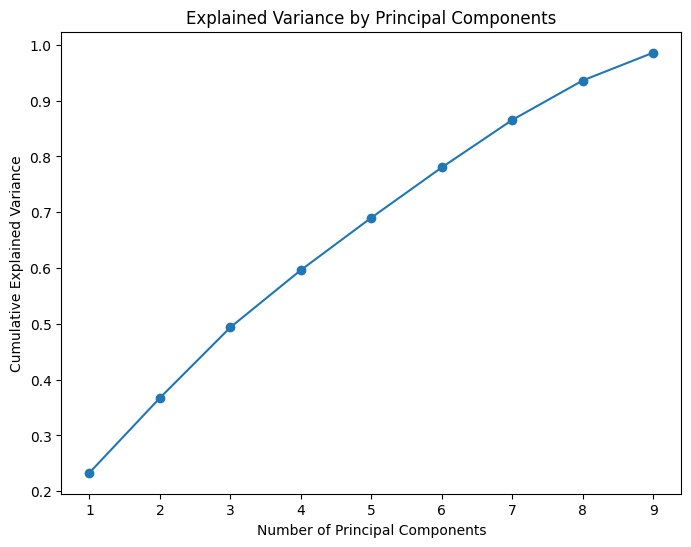

 Principal Component  Explained Variance Ratio  Cumulative Explained Variance
                   1                  0.233262                       0.233262
                   2                  0.134069                       0.367331
                   3                  0.126470                       0.493801
                   4                  0.102493                       0.596294
                   5                  0.093885                       0.690179
                   6                  0.090104                       0.780284
                   7                  0.085029                       0.865313
                   8                  0.070772                       0.936085
                   9                  0.049802                       0.985887


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Preparing the Data (dropping the target 'Weekly_Sales')
features = merged_df.drop(columns=['Weekly_Sales'])

numerical_features = features.select_dtypes(include=['float64', 'int64'])
categorical_features = features.select_dtypes(include=['uint8'])  # One-hot encoded variables

# Standardizing the features
scaler = StandardScaler()
scaled_numerical_features  = scaler.fit_transform(numerical_features)

# Applying PCA
pca = PCA(n_components=0.95)  # Retain enough components to explain 95% of the variance
principal_components = pca.fit_transform(scaled_numerical_features)

# Converting PCA components into a DataFrame
pca_df = pd.DataFrame(principal_components, 
                      columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Examining the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each principal component:\n{explained_variance}')

# Visualizing the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

explained_variance_df = pd.DataFrame({
    'Principal Component': range(1, len(explained_variance) + 1),
    'Explained Variance Ratio': explained_variance,
    'Cumulative Explained Variance': explained_variance.cumsum()
})

#explained_variance_df = explained_variance_df.reset_index(drop=False)
print(explained_variance_df.to_string(index=False))


Going to proceed with the first 5 principal components which account for 69% of the variance. Narrowed down from 10 to 5 features. 

Loadings for the first 5 principal components:
                   PC1       PC2       PC3       PC4       PC5
Temperature  -0.051841  0.109563  0.725419  0.048168  0.182802
Fuel_Price    0.269083 -0.272942  0.371053  0.258216 -0.326176
MarkDown1     0.596673 -0.056885  0.079260 -0.111090  0.019104
MarkDown2     0.194521 -0.015591 -0.448426 -0.192569 -0.300472
MarkDown3     0.013665  0.009169 -0.160624  0.883961 -0.100943
MarkDown4     0.548526 -0.061421  0.051368 -0.167863  0.060261
MarkDown5     0.411239  0.084956  0.037902  0.168272 -0.021484
CPI           0.016650  0.731636  0.154380 -0.059535  0.000226
Unemployment -0.146448 -0.598300  0.123315 -0.088880  0.281458
Size          0.197841  0.075441 -0.244548  0.179598  0.822218


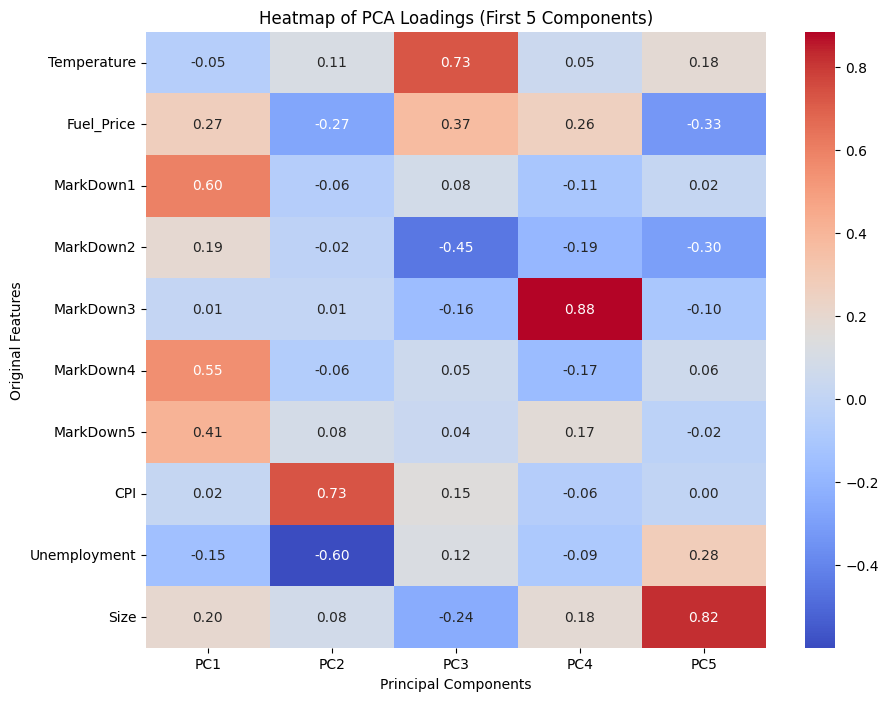

In [17]:
# Extract the PCA components (loadings) for all the components
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(pca.components_.shape[0])], 
                        index=numerical_features.columns)

# Limit the loadings to the first 5 principal components
loadings_first_5 = loadings.iloc[:, :5]

# Display the loadings for the first 5 principal components
print("Loadings for the first 5 principal components:")
print(loadings_first_5)

plt.figure(figsize=(10, 8))
sns.heatmap(loadings_first_5, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Heatmap of PCA Loadings (First 5 Components)')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.show()


PC1: Highly influenced by MarkDowns 1,4, and 5 which relate to store-wide promotions throughout the year.

PC2: Highly influenced by CPI and Unemployment- represents economic conditions

PC3: Highly influenced by Temperature, Fuel Price, and MarkDown2 (not part of regular store wide promotions)

PC4: Highly influenced by MarkDown3 (blacfriday and winter holiday type sales)

PC5: Highly influenced by Size

In [18]:
# Renaming the first 5 principal components
pca_df_5 = pca_df.iloc[:, :5]  # Extract the first 5 principal components
pca_df_5.columns = [
    'Store-Wide Promotions',
    'Economic Conditions',
    'Environmental and Event-Driven Promotions',
    'Black Friday and Holiday Promotions',
    'Store Size'
]

# renamed DataFrame
pca_df_5.head()


,Store-Wide Promotions,Economic Conditions,Environmental and Event-Driven Promotions,Black Friday and Holiday Promotions,Store Size
0,-0.96548,1.090497,-1.201231,-0.529195,0.648136
1,-0.96548,1.090497,-1.201231,-0.529195,0.648136
2,-0.96548,1.090497,-1.201231,-0.529195,0.648136
3,-0.96548,1.090497,-1.201231,-0.529195,0.648136
4,-0.96548,1.090497,-1.201231,-0.529195,0.648136


## Model Building Prep

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

final_features = pd.concat([pca_df, categorical_features.reset_index(drop=True)], axis=1)

y = merged_df['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(final_features, y, test_size=0.3, random_state=42)


## Linear Regression Model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Step 1: Define features (the principal components) and the target (Weekly_Sales)
X = pca_df_5  # The top 5 principal components
y = merged_df['Weekly_Sales']  # Target variable

# Step 2: Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 497948114.463829
R-squared (R²): 0.05409359665911795


## Random Forest Model

Random Forest with PCA, Store, and Dept - MSE: 487593083.6845944
Random Forest with PCA, Store, and Dept - R²: 0.0737640997423894


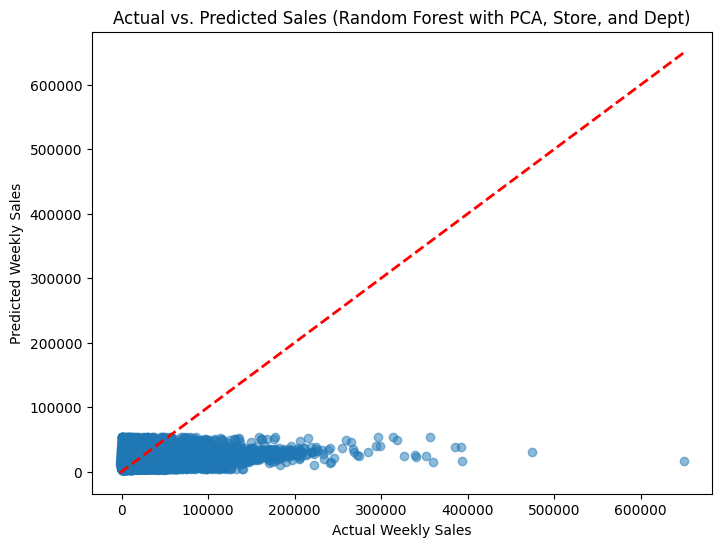

In [21]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Outputing the evaluation results
print(f"Random Forest with PCA, Store, and Dept - MSE: {mse_rf}")
print(f"Random Forest with PCA, Store, and Dept - R²: {r2_rf}")

# Visualizing Actual vs Predicted Sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('Actual vs. Predicted Sales (Random Forest with PCA, Store, and Dept)')
plt.show()

Random Forest without PCA - MSE: 32973716.611803066
Random Forest without PCA - R²: 0.9373628521143486


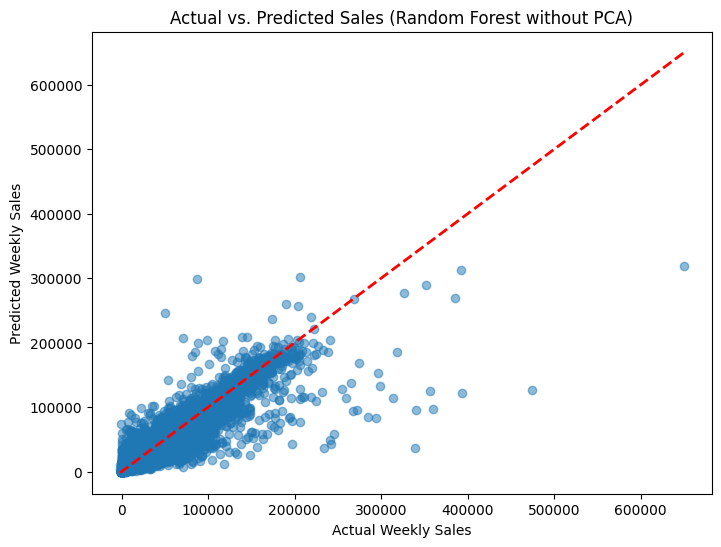

In [23]:
# Step 1: Use the merged_df without PCA (keep all features including Store, Dept, and numerical features)
# Drop 'Weekly_Sales' for the features and keep the categorical encoding done earlier
features_without_pca = merged_df.drop(columns=['Weekly_Sales'])

# Step 2: Define target
y = merged_df['Weekly_Sales']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(features_without_pca, y, test_size=0.3, random_state=42)

# Step 4: Train a Random Forest model without PCA
rf_model_no_pca = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_no_pca.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
y_pred_rf_no_pca = rf_model_no_pca.predict(X_test)

mse_rf_no_pca = mean_squared_error(y_test, y_pred_rf_no_pca)
r2_rf_no_pca = r2_score(y_test, y_pred_rf_no_pca)

# Output the evaluation results
print(f"Random Forest without PCA - MSE: {mse_rf_no_pca}")
print(f"Random Forest without PCA - R²: {r2_rf_no_pca}")

# Visualize Actual vs Predicted Sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf_no_pca, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('Actual vs. Predicted Sales (Random Forest without PCA)')
plt.show()

Lesson learned: make a default model before implementing PCA- PCA oversimplied model too much.